In [126]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from sklearn import linear_model
import tensorflow as tf

In [127]:
def featureNormalize(X):
    X_norm = X
    mu    = np.zeros((1, X.shape[1]))
    sigma = np.zeros((1, X.shape[1]))
    for i in range(X.shape[1]):
        mu[:,i] = np.mean(X[:,i])
        sigma[:,i] = np.std(X[:,i])
        X_norm[:,i] = (X[:,i] - float(mu[:,i]))/float(sigma[:,i])
    return X_norm, mu, sigma

In [128]:
# Compute the loss
def computeLoss(X,y,theta):
  m=len(y)
  Loss=0.0;
  Loss=1.0/2.0/m*np.sum((X.dot(theta)-y)**2);
  return Loss;

In [129]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y) 
    Loss_history = np.zeros((num_iters, 1))
    for i in range(num_iters):
        theta = theta - alpha*(1.0/m) * np.transpose(X).dot(X.dot(theta) - np.transpose([y]))    
        Loss_history[i] = computeLoss(X, y, theta)
    return theta, Loss_history

In [130]:
def normalEqn(X, y):  
    theta = np.zeros((X.shape[1], 1))
    theta = np.linalg.pinv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    return theta

In [131]:
def SolveGradientDescent(X,alpha, num_iters):
    theta = np.zeros((3, 1)) 
    theta, Loss_history = gradientDescent(X_padded, y, theta, alpha, num_iters)
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.show(block=False)
    theta.shape
    return theta

In [132]:
def SK_solve(X,y):
    lr = linear_model.LinearRegression()
    lr.fit(X,y)
    return lr

In [175]:
def TF_solve(X,y,learning_rate,training_epochs):
    mx,nx = X.shape
    my,ny = y.shape
    x_ph = tf.placeholder(tf.float32, shape = [None, nx])
    y_ph = tf.placeholder(tf.float32, shape = [None, ny])

    W = tf.Variable(tf.random_normal([nx,1]), name="Weight")
    b = tf.Variable(tf.random_normal([ny,1]), name="Intercept")

    hypothesis = tf.matmul(x_ph, W) + b
    init = tf.global_variables_initializer()
    Loss = tf.reduce_mean(tf.square(y_ph - hypothesis))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate= learning_rate)
    train = optimizer.minimize(Loss)
    sess = tf.Session()
    # Initialize all the variables
    sess.run(init)
    Loss_history = np.zeros((training_epochs, 1))
    counter=0
    for epochs in range(training_epochs):
        cost_val, hy_val, W_val, b_val, _ = sess.run([Loss, hypothesis, W, b, train],feed_dict = {x_ph:X_norm, y_ph:y})
        Loss_history[counter] = cost_val
        counter=counter+1
    plt.plot(range(Loss_history.size), Loss_history, "-b", linewidth=2 )
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.show(block=False)
    return W_val,b_val

In [168]:
data = np.loadtxt('data.txt', delimiter=",")
X = data[:,:2]
y = data[:,2]
m = len(y)
X_norm, mu, sigma = featureNormalize(X)
X_padded = np.column_stack((np.ones((m,1)), X_norm))
house_norm_padded = np.array([1, 1650, 3])

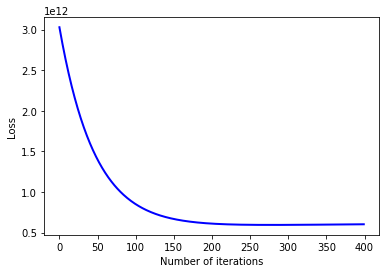

Theta computed from gradient descent:  [[ 334302.06399328]
 [  99411.44947359]
 [   3267.01285407]]
Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): [  1.64372995e+08]


In [169]:
#Solve using Gradient Descent
theta_GD=SolveGradientDescent(X=X_padded,alpha=0.01,num_iters=400)
# Display gradient descent's result
print('Theta computed from gradient descent: ',theta_GD)
price_GD = np.array(house_norm_padded).dot(theta)
print("Predicted price of a 1650 sq-ft, 3 br house (using gradient descent):", price_GD)


In [170]:
#Solve using normal equation
theta_Normal = normalEqn(X_padded, y)
print("Theta calculated by Normal Equation ",theta_Normal)
price_Normal = np.array(house_norm_padded).dot(theta_Normal)
print("Predicted price of a 1650 sq-ft, 3 br house (using normal equation):", price_Normal)

Theta calculated by Normal Equation  [ 340412.65957447  109447.79646964   -6578.35485416]
Predicted price of a 1650 sq-ft, 3 br house (using normal equation): 180909541.77


In [171]:
#Solve using SK-learn
lr=SK_solve(X_padded,y)
print("Theta calculated by SK-learn regression ",lr.coef_)
print("Predicted price ",lr.predict(house_norm_padded.reshape(1,-1)))

Theta calculated by SK-learn regression  [      0.          109447.79646964   -6578.35485416]
Predicted price  [  1.80909542e+08]


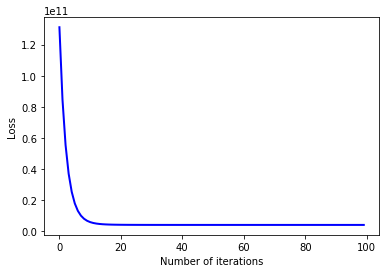

Theta calculated by tensorflow regression  [[ 340412.59375]] [[ 109442.        ]
 [  -6572.56298828]]
Predicted price  [[  1.80899995e+08]]


In [176]:
theta_TF,bias_TF=TF_solve(X_norm,y.reshape(-1,1),0.1,100)
print("Theta calculated by tensorflow regression ",bias_TF,theta_TF)
house_norm_padded = np.array([1650, 3])
print("Predicted price ",np.array(house_norm_padded).dot(theta_TF)+bias_TF)

(3,)